#### CSCE 489 :: Data Science and Analytics :: Texas A&M University :: Fall 2016

# Group Project: Analyzing Stack Over Flow Question 
### Team: StackPack
### Members: Stephen Brownlee, Eric Chung, Kyle Preston, Jacob Stafford



## Overview
- Clean and extract the data
- Analyze data
- Observe patterns and extract information
- Draw conclusions 

Data was found at:
    https://www.kaggle.com/stackoverflow/pythonquestions

Useful website: https://www.kaggle.com/jiashenliu/d/stackoverflow/pythonquestions/if-we-treat-stack-overflow-as-a-social-network

C:\Users\s\Anaconda2\envs\cs489\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



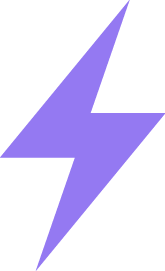

Running local mode, some functionality limited.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import warnings
from lightning import Lightning
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sea
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')
%matplotlib inline
lgn = Lightning(ipython=True, local=True)

## Cleaning the data

In [2]:
answers = pd.read_csv('./answers.csv', encoding = 'iso-8859-1')
questions = pd.read_csv('./questions.csv', encoding = 'iso-8859-1')
answers['Length'] = answers.Body.str.len()
questions['Length'] = questions.Body.str.len()
answers.head()

Id  OwnerUserId          CreationDate  ParentId  Score IsAcceptedAnswer  \
0  79741       3259.0  2008-09-17T03:43:22Z     79709     -1            False   
1  79768       6043.0  2008-09-17T03:48:29Z     79709      5            False   
2  79779       8002.0  2008-09-17T03:49:36Z     79709      0            False   
3  79788          NaN  2008-09-17T03:51:30Z     79709      3            False   
4  79827      14257.0  2008-09-17T03:58:26Z     79709      1            False   

                                                Body  Length  
0  <p>It's tough to say definitively without know...     328  
1  <p>use variables in the outer function instead...     430  
2  <p>Third approach: inner function returns a re...     341  
3  <p>It's not going to make much difference to m...     739  
4  <p>I'm not sure I understand the question, but...    1054

## Feature Creation: Word Count

In [3]:
#Filtering the answers, in which all of the tags are removed
answers['Filtered'] = answers.Body.str.strip().str.lower().str.replace('<p>', ' ').str.replace('</p>', ' ').str.replace('<code>', ' ').str.replace('</code>', ' ').str.replace('<blockquote>', ' ').str.replace('</blockquote>', ' ').str.replace('<pre>', ' ').str.replace('</pre>', ' ').str.replace('\n', ' ')
#Getting thlength of the new filtered answers
answers['Length_Filtered'] = answers.Filtered.str.len()
answers.head()

Id  OwnerUserId          CreationDate  ParentId  Score IsAcceptedAnswer  \
0  79741       3259.0  2008-09-17T03:43:22Z     79709     -1            False   
1  79768       6043.0  2008-09-17T03:48:29Z     79709      5            False   
2  79779       8002.0  2008-09-17T03:49:36Z     79709      0            False   
3  79788          NaN  2008-09-17T03:51:30Z     79709      3            False   
4  79827      14257.0  2008-09-17T03:58:26Z     79709      1            False   

                                                Body  Length  \
0  <p>It's tough to say definitively without know...     328   
1  <p>use variables in the outer function instead...     430   
2  <p>Third approach: inner function returns a re...     341   
3  <p>It's not going to make much difference to m...     739   
4  <p>I'm not sure I understand the question, but...    1054   

                                            Filtered  Length_Filtered  
0   it's tough to say definitively without knowin...              322  
1   use variables in the outer function instead o...              419  
2   third approach: inner function returns a refe...              330  
3   it's not going to make much difference to mem...              718  
4   i'm not sure i understand the question, but i...             1008

In [4]:
#Filtering the questions, in which all of the tags are removed
questions['Filtered'] = questions.Body.str.strip().str.lower().str.replace('<p>', ' ').str.replace('</p>', ' ').str.replace('<code>', ' ').str.replace('</code>', ' ').str.replace('<blockquote>', ' ').str.replace('</blockquote>', ' ').str.replace('<pre>', ' ').str.replace('</pre>', ' ').str.replace('\n', ' ')
#Getting the length of the new filtered questions
questions['Length_Filtered'] = questions.Filtered.str.len()
print len(questions.Body)
questions.head()

147075


Id  OwnerUserId          CreationDate  Score  \
0   77434      14008.0  2008-09-16T21:40:29Z    134   
1   79709          NaN  2008-09-17T03:39:16Z      1   
2   95007      15842.0  2008-09-18T17:59:19Z     48   
3  103312          NaN  2008-09-19T16:09:26Z      4   
4  255697    1941213.0  2008-11-01T15:48:30Z      3   

                                               Title  \
0          How to access the last value in a vector?   
1  Worse sin: side effects or passing massive obj...   
2               Explain the quantile() function in R   
3                 How to test for the EOF flag in R?   
4  Is there an R package for learning a Dirichlet...   

                                                Body  Length  \
0  <p>Suppose I have a vector that is nested in a...     405   
1  <p>I have a function inside a loop inside a fu...    1102   
2  <p>I've been mystified by the R quantile funct...    1919   
3  <p>How can I test for the <code>EOF</code> fla...     183   
4  <p>I'm looking for a an <code>R</code> package...     485   

                                            Filtered  Length_Filtered  
0   suppose i have a vector that is nested in a d...              327  
1   i have a function inside a loop inside a func...             1066  
2   i've been mystified by the r quantile functio...             1746  
3   how can i test for the  eof  flag in r?     f...              141  
4   i'm looking for a an  r  package which can be...              457

### Feature Creation: Response Time

In [5]:
from datetime import datetime
answers_1000 = answers[:1000]
answers_1000.head(10)
answers_1000['ResponseTime'] = answers_1000['Id'].apply(lambda x: 0.0)
count = 0
for x in answers_1000['ParentId']:
    cuur = questions[questions['Id']==x]['CreationDate']
    my_date = answers_1000.loc[count, 'CreationDate']
    response_time = (pd.to_datetime(my_date) - pd.to_datetime(cuur)) / np.timedelta64(1, 'D') 
    response_time = response_time.values[0]
    answers_1000.set_value(count,'ResponseTime',response_time)
    count+=1
answers_1000.head()

Id  OwnerUserId          CreationDate  ParentId  Score IsAcceptedAnswer  \
0  79741       3259.0  2008-09-17T03:43:22Z     79709     -1            False   
1  79768       6043.0  2008-09-17T03:48:29Z     79709      5            False   
2  79779       8002.0  2008-09-17T03:49:36Z     79709      0            False   
3  79788          NaN  2008-09-17T03:51:30Z     79709      3            False   
4  79827      14257.0  2008-09-17T03:58:26Z     79709      1            False   

                                                Body  Length  \
0  <p>It's tough to say definitively without know...     328   
1  <p>use variables in the outer function instead...     430   
2  <p>Third approach: inner function returns a re...     341   
3  <p>It's not going to make much difference to m...     739   
4  <p>I'm not sure I understand the question, but...    1054   

                                            Filtered  Length_Filtered  \
0   it's tough to say definitively without knowin...              322   
1   use variables in the outer function instead o...              419   
2   third approach: inner function returns a refe...              330   
3   it's not going to make much difference to mem...              718   
4   i'm not sure i understand the question, but i...             1008   

   ResponseTime  
0      0.002847  
1      0.006400  
2      0.007176  
3      0.008495  
4      0.013310

### Creating Feature: Year

In [53]:
answers_1000['Year'] = answers_1000['CreationDate'].str[:4]
#Can't use negative scores, so we offset the values until all are greater than 0
answers_1000['Score'] = answers_1000['Score']+5
answers_1000['ResponseTime'] = answers_1000['ResponseTime'].apply(lambda x: 0 if x<0 else x)

In [54]:
split_q = np.split(questions, 3)
print len(split_q[1])
print len(split_q[0])
print len(split_q[2])

test_q = split_q[0]
train_q = split_q[1]

49025
49025
49025


In [55]:
split_a = np.split(answers_1000, 2)
print len(split_a[1])
print len(split_a[0])

train_a = split_a[0]
test_a = split_a[1]

500
500


### Feature Ranking for IsAcceptedAnswer and Score using an Extra Random Forest

Below we use sklearn's _feature_ _importances_ to identify the most impactful features in the model. Specifically, we'll see how each feature affects accepted answer rates or score. Because the dataset is too large, we take folds of it, a few thousand at a time. Disappointly, we don't see much here. Most features are comparable in importance. Strangely, we see Score has some importance in determining IsAcceptedAnswer, but IsAcceptedAnswer has almost no correlation to Score. This puts doubts on the obvious hypothesis of more score = higher acceptance rate.

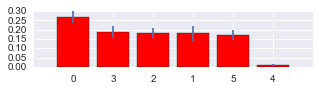

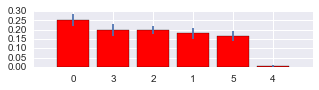

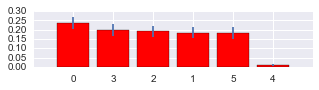

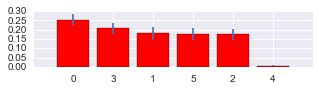

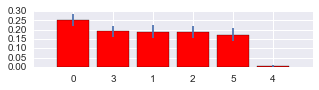

In [86]:
k = 9000 #only take k answers to prevent running out of memory 

X = train_a[['Score', 'Length_Filtered','Id','Length','Year','ResponseTime']][:k]
y = train_a['IsAcceptedAnswer'][:k]

kf = cross_validation.KFold(n=X.shape[0], n_folds=5, shuffle=True, random_state=0)

for train_index, test_index in kf:
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]
    forest = ExtraTreesClassifier(n_estimators=50, random_state=0)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(5, 1))
    plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

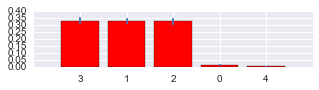

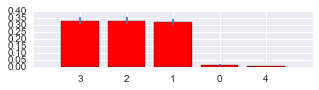

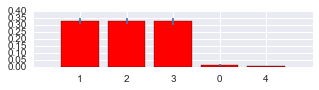

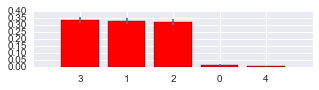

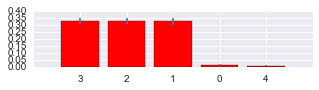

In [87]:
k = 1000
X = train_a[['IsAcceptedAnswer', 'Length_Filtered','Id','ResponseTime','Year']][:k]
y = train_a['Score'][:k]

kf = cross_validation.KFold(n=X.shape[0], n_folds=5, shuffle=True, random_state=0)
for train_index, test_index in kf:
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]
    forest = ExtraTreesClassifier(n_estimators=150,random_state=0)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(5, 1))
    plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

## So now what? 

We move to classifiers, comparing each one's ability to determine if a question will be accepted or receive a high score.
Because there are few features, we try them individually with different combinations of classifiers looking for a promising combination.

#### First, we'll look at length vs. accepted answers

In [187]:
features = ['Length']
target = ['IsAcceptedAnswer']
x_train = train_a[features]
y_train = train_a[target]
x_test = test_a[features]
y_test = test_a[target]

In [202]:
X = answers_1000[features][:k]
y = answers_1000[target][:k] #target
folds = 5
tesum, trsum, dtsum, drsum,rtsum,rrsum = 0,0,0,0,0,0
kf = cross_validation.KFold(n=X.shape[0], n_folds=folds, shuffle=True, random_state=0)
for train_index, test_index in kf:
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    tesum =tesum + clf.score(X_test,y_test)
    trsum =trsum + clf.score(X_train,y_train)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    dtsum =dtsum + clf.score(X_test,y_test)
    drsum =drsum + clf.score(X_train,y_train)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    rtsum =dtsum + clf.score(X_test,y_test)
    rrsum =drsum + clf.score(X_train,y_train)

print 'Test and Train mean values'
print 'Multinomial:', tesum/folds, trsum/folds
print  'DecisionTree:', dtsum/folds, drsum/folds
print  'RandomForest:', rrsum/folds, rtsum/folds

Test and Train mean values
Multinomial: 0.082 0.08425
DecisionTree: 0.056 0.9765
RandomForest: 1.15825 0.067


### Now we look at the relationship between the length of an answer and its score with 3 classifiers.
This turns out to be only half as useful.

In [203]:
target = 'Score'
features = ['Year','ResponseTime']
x_train = train_a[features]
x_test = test_a[features]
y_train = train_a[target]
y_test = test_a[target]

In [204]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print 'Training accuracy: ',clf.score(x_train,y_train)
print 'Testing accuracy: ',clf.score(x_test, y_test)

Training accuracy:  0.994
Testing accuracy:  0.06


In [205]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
print 'Training accuracy: ',clf.score(x_train,y_train)
print 'Testing accuracy: ',clf.score(x_test, y_test)

Training accuracy:  0.08
Testing accuracy:  0.1


### Feature Creation: CountVectorizer
What about the relationship between words used and the score of an answer or its likelihood of being accepted? Again, because of the size of the data, we take folds and average their scores.

In [206]:
tf_vectorizer = CountVectorizer()
#using the first k answers
k = 1000
features = 'Filtered'
target = 'IsAcceptedAnswer'
X = answers[features][:k]
y = answers[target][:k] #target
folds = 5
msum, rsum, lsum = 0,0,0
kf = cross_validation.KFold(n=X.shape[0], n_folds=folds, shuffle=True, random_state=0)
for train_index, test_index in kf:
    X_train = tf_vectorizer.fit_transform(X.ix[train_index])
    X_test = tf_vectorizer.transform(X.ix[test_index])
    y_train, y_test = y.ix[train_index], y.ix[test_index]

    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    msum = msum + clf.score(X_test, y_test)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    rsum = rsum + clf.score(X_test, y_test)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    lsum = lsum + clf.score(X_test, y_test)

msum, rsum, lsum = msum/folds, rsum/folds,lsum/folds
print 'Answer Text -> IsAcceptedAnswer MultinomialNB Score: ', msum
print 'Answer Text -> IsAcceptedAnswer RandomForeset Score: ', rsum
print 'Answer Text -> IsAcceptedAnswer LogisticRegression Score: ', lsum

Answer Text -> IsAcceptedAnswer MultinomialNB Score:  0.647
Answer Text -> IsAcceptedAnswer RandomForeset Score:  0.698
Answer Text -> IsAcceptedAnswer LogisticRegression Score:  0.64


In [209]:
tf_vectorizer = CountVectorizer()
#using the first k answers
k = 500
target = 'Score'
X = answers[features][:k]
y = answers[target][:k]
folds = 5
msum, rsum, lsum = 0,0,0
kf = cross_validation.KFold(n=X.shape[0], n_folds=folds, shuffle=True, random_state=0)
for train_index, test_index in kf:
    X_train = tf_vectorizer.fit_transform(X.ix[train_index])
    X_test = tf_vectorizer.transform(X.ix[test_index])
    y_train, y_test = y.ix[train_index], y.ix[test_index]

    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    msum = msum + clf.score(X_test, y_test)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    rsum = rsum + clf.score(X_test, y_test)
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    lsum = lsum + clf.score(X_test, y_test)

msum,rsum,lsum = msum/folds, rsum/folds, lsum/folds
print 'Answer Text -> Score MultinomialNB Score: ', msum
print 'Answer Text -> Score RandomForeset Score: ', rsum
print 'Answer Text -> Score LogisticRegression Score: ', lsum

Answer Text -> Score MultinomialNB Score:  0.124
Answer Text -> Score RandomForeset Score:  0.11
Answer Text -> Score LogisticRegression Score:  0.112


We can see the words used in your answer are much more impactful in being accepted than in your score! Just for completeness, let's try using values that we suspect **should not be related to IsAcceptedAnswer** and see what score we get:

In [208]:
tf_vectorizer = CountVectorizer()
#using the first k answers
k = 500
target = 'Id'
X = answers[features][:k]
y = answers[target][:k] #target
folds = 5
msum, rsum, dsum = 0,0,0
kf = cross_validation.KFold(n=X.shape[0], n_folds=folds, shuffle=True, random_state=0)
for train_index, test_index in kf:
    X_train = tf_vectorizer.fit_transform(X.ix[train_index])
    X_test = tf_vectorizer.transform(X.ix[test_index])
    y_train, y_test = y.ix[train_index], y.ix[test_index]

    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    msum = msum + clf.score(X_test, y_test)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    rsum = rsum + clf.score(X_test, y_test)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    dsum = dsum + clf.score(X_test, y_test)

msum, rsum, dsum = msum/folds, rsum/folds, dsum/folds
print 'Answer Text -> Id MultinomialNB Score: ', msum
print 'Answer Text -> Id RandomForeset Score: ', rsum
print 'Answer Text -> Id DecisionTree Score: ', dsum

Answer Text -> Id MultinomialNB Score:  0.0
Answer Text -> Id RandomForeset Score:  0.0
Answer Text -> Id DecisionTree Score:  0.0


Finally, let's see how other classifiers fare when used with Score and IsAcceptedAnswer features. We see that IsAcceptedAnswer consistently enjoys a higher correlation score.

In [148]:
target = answers['IsAcceptedAnswer'][:k]
k = 1000
aascores = []
print ("Scores for words -> 'IsAcceptedAnswer' ")

print("MultinomialNB")
fit_and_score(clf, tf_train, tf_test, target, aascores)

print("Support vector classifier")
fit_and_score(clf2, tf_train, tf_test, target, aascores)

print("Logistic regression")
fit_and_score(clf3, tf_train, tf_test, target, aascores)

print("Nearest centroid")
fit_and_score(clf4, tf_train, tf_test, target, aascores)

print("SVR")
fit_and_score(clf5, tf_train, tf_test, target, aascores)

Scores for words -> 'IsAcceptedAnswer' 
MultinomialNB
0.884 

Support vector classifier
0.709 

Logistic regression
0.994 

Nearest centroid
0.633 

SVR
-0.0338116930185 



In [140]:
clf = MultinomialNB()
clf2 = SVC()
clf3 = LogisticRegression()
clf4 = NearestCentroid()
clf5 = SVR()

k = 1000
target = answers['Score'][:k]
answer_text = answers['Filtered'][:k]
tf_train = tf_vectorizer.fit_transform(answer_text)
tf_test = tf_vectorizer.transform(answer_text)

sscores = []
print ("Scores for words -> 'Score' ")

def fit_and_score(clf, train, test, target, scores):
    clf.fit(train, target)
    print clf.score(test, target), "\n"
    scores.append(clf.score(test, target))

print("MultinomialNB")
fit_and_score(clf, tf_train, tf_test, target, sscores)

print("Support vector classifier")
fit_and_score(clf2, tf_train, tf_test, target, sscores)

print("Logistic regression")
fit_and_score(clf3, tf_train, tf_test, target, sscores)

print("Nearest centroid")
fit_and_score(clf4, tf_train, tf_test, target, sscores)

print("SVR")
fit_and_score(clf5, tf_train, tf_test, target, sscores)

Scores for words -> 'Score' 
MultinomialNB
0.565 

Support vector classifier
0.136 

Logistic regression
0.998 

Nearest centroid
0.289 

SVR
-0.0361438614245 



#### Looks like some classifiers (like Logistic Regression) give near-perfect scores when we don't use cross-validation!
Across the results, MultinomialNB seems the most reliable.


### Scaling Score 
Now, let's try to improve these classifiers' scores. First, we try alternate ways of defining 'Score.'  What if we sort score values into ** 5 custom-defined buckets? **


In [138]:
score_scaled = []
scscores = []
for answer in answers['Score']:
    if (answer<0):
        score_scaled.append(0)
    elif (answer < 1):
        score_scaled.append(1)
    elif (answer < 5):
        score_scaled.append(2)
    elif (answer < 15):
        score_scaled.append(3)
    else:
        score_scaled.append(4)
        
target = score_scaled[:k]

print("MultinomialNB")
fit_and_score(clf, tf_train, tf_test, target,scscores)

print("Support vector classifier")
fit_and_score(clf2, tf_train, tf_test, target,scscores)

print("Logistic regression")
fit_and_score(clf3, tf_train, tf_test, target,scscores)

print("Nearest centroid")
fit_and_score(clf4, tf_train, tf_test, target,scscores)

print("SVR")
fit_and_score(clf5, tf_train, tf_test, target,scscores)

MultinomialNB
0.841 

Support vector classifier
0.43 

Logistic regression
0.998 

Nearest centroid
0.266 

SVR
0.0279552547551 



In [141]:
score_scaled = []
scscores2 = []
for answer in answers['Score']:
    if (answer<0):
        score_scaled.append(0)
    elif (answer < 1):
        score_scaled.append(1)
    elif (answer < 10):
        score_scaled.append(2)
    elif (answer < 50):
        score_scaled.append(3)
    else:
        score_scaled.append(4)
        
target = score_scaled[:k]

print("MultinomialNB")
fit_and_score(clf, tf_train, tf_test, target,scscores2)

print("Support vector classifier")
fit_and_score(clf2, tf_train, tf_test, target,scscores2)

print("Logistic regression")
fit_and_score(clf3, tf_train, tf_test, target,scscores2)

print("Nearest centroid")
fit_and_score(clf4, tf_train, tf_test, target,scscores2)

print("SVR")
fit_and_score(clf5, tf_train, tf_test, target,scscores2)

MultinomialNB
0.858 

Support vector classifier
0.642 

Logistic regression
0.997 

Nearest centroid
0.257 

SVR
0.0580963561882 



### Comparison of binned Score, unbinned Score, and IsAcceptedAnswer values across 5 models
Key: Green = unbinned, Purple = bin method 1, Blue = bin method 2, Red = IsAcceptedAnswer

In [147]:
lgn.line([scscores,scscores2,sscores,aascores], xaxis='models', yaxis='scores', zoom=False, description='3-NC, 4-SVR')

#### Above, we can see this binning technique was a successful strategy to improve our score...
for all classifiers except **Nearest Centroid,** which became slightly worse. **SVR** seems overall unusable. It should also be noted that binning the data reduces the noise caused by the over-representation of the *-1* and *0* scores, but it also arguably **reduces the robustness of our data model,** as this distribution of SO scores might not necessarily pertain to all data sets collected from SO.

## Can we say something about how "accepted" answers use distinct words?

We'll use the words **need** and **don't need** to identify user confidence. Presumably, using imperative diction like that indicates a sense of self confidence.

In [55]:
a_true = answers.loc[answers['IsAcceptedAnswer'] == True]
pd.options.display.max_colwidth = 5000
a_true['Body'].head()

# using the words 'need' and 'don't need' to measure user confidence.
a_filter_word = answers.loc[answers['Body'].str.contains("need" and "don't need")] # change and -> or for diff results.
a_true = a_filter_word.loc[a_filter_word['IsAcceptedAnswer'] == True]

# (un)comment these out accordingly to see the data.
a_filter_word.shape[0] # show all
a_true.shape[0] # just true

1017

### So it turns out that ...

from a dataset of *198,592* posted answers, of which *87,661* (44%) are accepted and *110,931* are not, **1985** of them contain the words **need AND don't need,** and from *that* set, **1017** posts are accepted answers, meaning that about **51%** of SO users that employ those words also post accepted answers.

Similar tests with other words yield **even worse** results. 

Therefore, we suppose **using words does not serve as a good measure of determining accepted answers,** at least as far as we can tell. 

## Grouping the data by user ID
Let's see if we can find out something about any particular SO user.

In [56]:
question_ids = questions['OwnerUserId'].unique()
answer_ids = answers['OwnerUserId'].unique()

combined_id=set(question_ids).intersection(answer_ids)
print 'So we have '+str(len(combined_id))+' users that post both questions and answers on StackOverFlow'

So we have 11194 users that post both questions and answers on StackOverFlow


In [57]:
users = pd.DataFrame({'idUser':list(combined_id)})
users['Quantity']=users['idUser'].apply(lambda x: len(questions[questions['OwnerUserId']==x]['Body'])+len(answers[answers['OwnerUserId']==x]['Body']))
users=users.sort(['Quantity'],ascending=0).reset_index(drop=True)

users_head_20 = users[0:20]

users_a = pd.DataFrame({'idUser':list(answer_ids)})
users_a['Quantity'] = users_a['idUser'].apply(lambda x: len(answers[answers['OwnerUserId'] == x]['Body']))
users_a = users_a.sort(['Quantity'], ascending = 1).reset_index(drop = True)

users.head()

idUser  Quantity
0  1855677.0      4997
1  1270695.0      2643
2  2372064.0      2314
3   143305.0      2245
4  1838509.0      2201

### SO users who post the most 

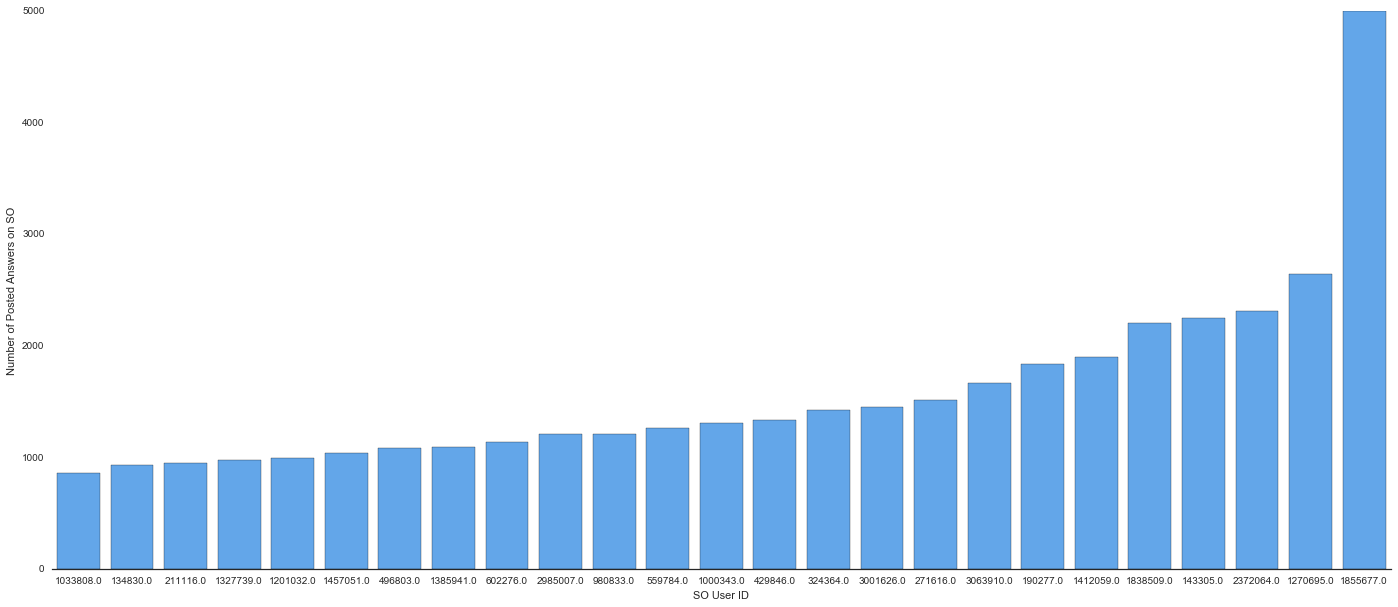

In [59]:
# modified barplot code (mostly) recycled from Eric's Spotlight. always recycle, including code!
def plot_bar(x_data, y_data, x_label_axis, y_label_axis, color):
    # plot properties.
    sea.set_style("white")
    sea.set_context({"figure.figsize": (24, 10)})
    my_plot = sea.barplot(x = x_data, y = y_data, order = id_less, color = color)
    bar = plt.Rectangle((0,0), 1, 1, fc = color,  edgecolor = 'none')
    sea.despine(left = True)
    my_plot.set_xlabel(x_label_axis) # axes settings.
    my_plot.set_ylabel(y_label_axis)


# grabbing So user data filtered above.
users = users.sort(['Quantity'],ascending = 1).reset_index(drop = True) # ascending order

# plot input
less_buffer = 25 # change to see different plots, but labels might get mushed.
id_less = users['idUser'].tail(less_buffer)
quantity_less = users['Quantity'].tail(less_buffer)
x_label = "SO User ID"
y_label = "Number of Posted Answers on SO"
muted_blue = "#4da6ff"

# just use the function!
plot_bar(id_less, quantity_less, x_label, y_label, muted_blue)

Here we can clearly distinguish the number of posted answers among the **top twenty five SO answer posters**. Notice the gaping difference between the top poster, *i.e.* SO user 1855677, and the ones that follow behind.

It seems worthwhile to further investigate him/her.

In [60]:
# An example of how we can inspect a specific user by their ID.
# We show all the SO data associated with that user ID.
Q_data=questions[['OwnerUserId','Body']]
A_data=answers[['OwnerUserId','Body']]
question=Q_data[Q_data['OwnerUserId'].isin(users)]
answer=A_data[A_data['OwnerUserId'].isin(users)]

# highest = answers.loc[answers['OwnerUserId'] == 1855677.0]
highest = answers.loc[answers['OwnerUserId'] == 1855677.0]
# highest.head() # uncomment to see prints.

# TODO (Eric)
~~** 1. How many people post answers? **~~

~~** 2. What does the true/false ratio look like? **~~

** 3. Show data by higher ratios. **

** 4. Track those users over time. ** 

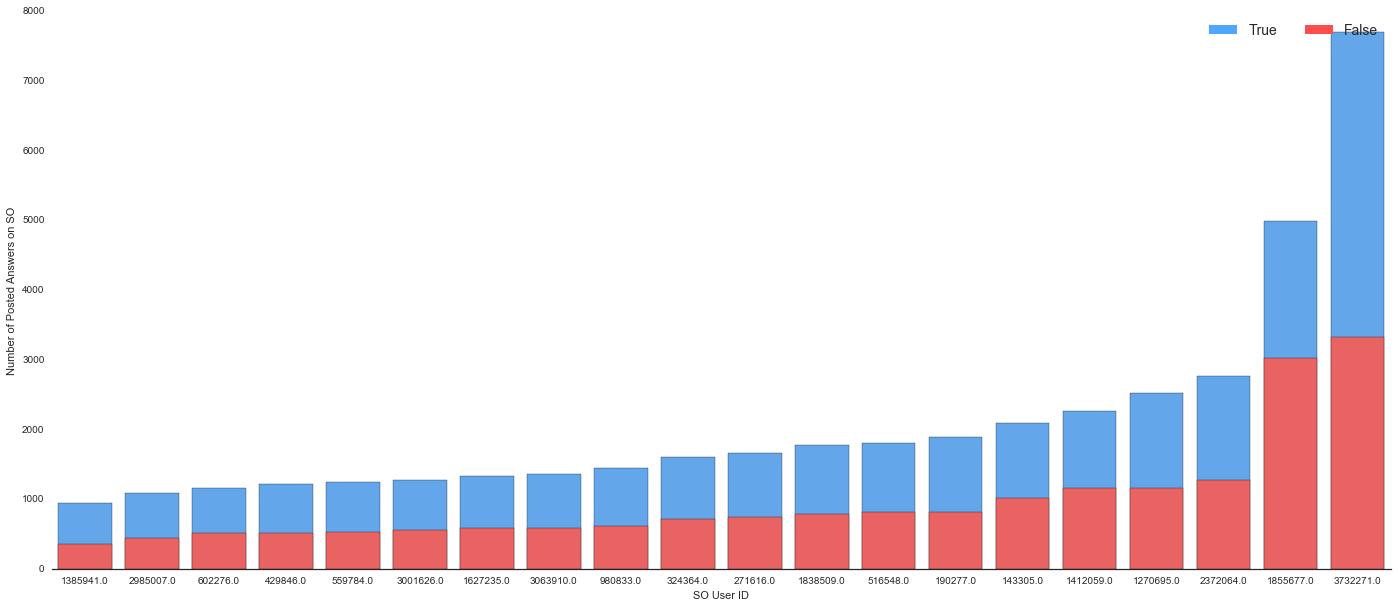

In [61]:
users_a = users_a.sort(['Quantity'], ascending = 0).reset_index(drop = True)
users_ids = users_a['idUser'] # grab all user_ids in a list (in ascending order).
a_true_list = []
a_false_list = []
bool_print = 0;

# modified barplot code (also mostly) recycled from Eric's Spotlight. always recycle, including code!
def plot_bar_stack(x_label, y_label, 
                   x_data, x_order, 
                   y_data_top, y_data_top_label, color_top,
                   y_data_bottom, y_data_bottom_label, color_bottom):
    # plot properties.
    sea.set_style("white")
    sea.set_context({"figure.figsize": (24, 10)})
    sea.barplot(x = x_data, y = y_data_top, order = x_order, color = color_top) # top plot
    bottom_plot = sea.barplot(x = x_data, y = y_data_bottom, order = x_order, # bottom plot
                              color = color_bottom)
    
    topbar = plt.Rectangle((0,0), 1, 1, fc = color_top, edgecolor = 'none')
    bottombar = plt.Rectangle((0,0), 1, 1, fc = color_bottom,  edgecolor = 'none')
    
    leg = plt.legend([topbar, bottombar], [y_data_top_label, y_data_bottom_label], # legend settings.
                     loc = 1, ncol = 2, prop = {'size':14})
    leg.draw_frame(False)
    sea.despine(left = True)
    
    bottom_plot.set_xlabel(x_label) # axes settings.
    bottom_plot.set_ylabel(y_label)

    
def top_twenty_data(bool_print):
    for i in range(len(users_ids[:20])):
        tmp_df = answers.loc[answers['OwnerUserId'] == users_ids[i]]
        tmp_df_true = tmp_df.loc[tmp_df['IsAcceptedAnswer'] == True]
        tmp_df_false = tmp_df.loc[tmp_df['IsAcceptedAnswer'] == False]
        a_true_list.append(tmp_df_true.shape[0])
        a_false_list.append(tmp_df_false.shape[0])
        if bool_print == 1:
            if i == 0:
                print "IsAcceptedAnswer"
            print "--------------------"
            print "user no.", users_ids[i]
            print "rank", i + 1
            print "true =", tmp_df_true.shape[0]
            print "false =", tmp_df_false.shape[0]
    
            if tmp_df_true.shape[0] > tmp_df_false.shape[0]:
                print "more true by", tmp_df_true.shape[0] - tmp_df_false.shape[0]
            if tmp_df_true.shape[0] < tmp_df_false.shape[0]:
                print "more false by", tmp_df_false.shape[0] - tmp_df_true.shape[0]
    

top_twenty_data(0); # 1 = print; 2 = don't print; print to see precise data.

users_a_true = pd.DataFrame()
users_a_true['user_id'] = list(users_ids.head(20))
users_a_true['quantity'] = list(a_true_list)
users_a_true= users_a_true.sort(['quantity'], ascending = 1).reset_index(drop = True)    

users_a_false = pd.DataFrame()
users_a_false['user_id'] = list(users_ids.head(20))
users_a_false['quantity'] = list(a_false_list)
users_a_false = users_a_false.sort(['quantity'], ascending = 1).reset_index(drop = True)

# plot input
less_buffer = 20 # change to see different plots, but labels might get mushed.
a_id_less = users_a_true['user_id'] # x data
a_true_less = users_a_true['quantity'] + users_a_false['quantity'] # y_top_data
a_false_less = users_a_false['quantity'] # y_bottom_data
x_label = "SO User ID"
y_label = "Number of Posted Answers on SO"
y_top_label = "True"
y_bottom_label = "False"
muted_red = "#ff4d4d"
muted_blue = "#4da6ff"

plot_bar_stack(x_label, y_label,
               a_id_less, a_id_less,
               a_true_less, y_top_label, muted_blue,
               a_false_less, y_bottom_label, muted_red)


### Here, we just attempt to conglomerate all the SO data for a user ID into one text field.

In [62]:
combined_questions=[]
combined_answers=[]
user_ids=list(users['idUser'])
for id in user_ids:
    Q_frame=questions[questions['OwnerUserId']==id].reset_index(drop=True)
    A_frame=answers[answers['OwnerUserId']==id].reset_index(drop=True)
    for i in range(len(Q_frame['OwnerUserId'])):
        if i==0:
            tmp=Q_frame['Filtered'][i]
        else:
            tmp=tmp+Q_frame['Filtered'][i]
    combined_questions.append(tmp)
    
    for j in range(len(A_frame['OwnerUserId'])):
        if j==0:
            tmp2=A_frame['Filtered'][j]
        else:
            tmp2=tmp2+A_frame['Filtered'][j]
    combined_answers.append(tmp2)


In [26]:
Question_C=[]
Answer_C=[]

for i in range(11194):
    tmp1="".join(combined_questions[i])
    tmp2="".join(combined_answers[i])
    Question_C.append(tmp1)
    Answer_C.append(tmp2)

In [27]:
Final_frame=pd.DataFrame({'User_id':user_ids,'Question':Question_C,'Answer':Answer_C})
Final_frame.head()
series_a = Final_frame.loc[Final_frame['User_id'] == 1855677.0].Answer
string_series = series_a.to_string().replace('   ','')
print string_series

0  ?break only gets you out of loop. ?try lets you set up code that might fail and gracefully recover. b&lt;-(y!=0)+0  &gt; b  [1] 0 1 1 1 0 0 1 1 0 1 0 0 "preprocess" in r:  lines &lt;- "www, rrr, 1,234, ttt \n rrr,zzz, 1,234,567,987, rrr"can use  readlines  on a  textconnection . then remove only the commas that are between digits:  gsub("([0-9]+)\\,([0-9])", "\\1\\2", lines)  ## [1] "www, rrr, 1234, ttt \n rrr,zzz, 1234567987, rrr"it's als useful to know but not directly relevant to this question that commas as decimal separators can be handled by read.csv2 (automagically) or read.table(with setting of the 'dec'-parameter).  edit: later i discovered how to use colclasses by designing a new class. see: <a href="http://stackoverflow.com/questions/25088144/how-to-load-df-with-1000-separator-in-r-as-numeric-class/25090565#25090565">how to load df with 1000 separator in r as numeric class?</a>  the "chi-square test" is usually generated as the sum of squared individual cell deviations fr

## Added By KP - Showing a time line of the top 20 users' scores

In [63]:
users_head_20.head()

idUser  Quantity
0  1855677.0      4997
1  1270695.0      2643
2  2372064.0      2314
3   143305.0      2245
4  1838509.0      2201

#### Grouping each of the top 20 users' answers by the year they were posted

In [29]:
idUsers = set(users_head_20['idUser'])
users_score = pd.DataFrame({'idUser':list(idUsers)})


In [30]:
users_score['overall_score_2008'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2008'] = users_score['idUser'].apply(lambda x: 0)

users_score['overall_score_2009'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2009'] = users_score['idUser'].apply(lambda x: 0)

users_score['overall_score_2010'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2010'] = users_score['idUser'].apply(lambda x: 0)

users_score['overall_score_2011'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2011'] = users_score['idUser'].apply(lambda x: 0)

users_score['overall_score_2012'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2012'] = users_score['idUser'].apply(lambda x: 0)

users_score['overall_score_2013'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2013'] = users_score['idUser'].apply(lambda x: 0)

users_score['overall_score_2014'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2014'] = users_score['idUser'].apply(lambda x: 0)

users_score['overall_score_2015'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2015'] = users_score['idUser'].apply(lambda x: 0)

users_score['overall_score_2016'] = users_score['idUser'].apply(lambda x: 0)
users_score['posts_2016'] = users_score['idUser'].apply(lambda x: 0)


In [31]:
print 
for y in ['08','09', '10', '11', '12', '13', '14', '15','16']:
    count = 0
    for x in users_score['idUser']:
        cuur = answers[(answers['OwnerUserId']==x) & ((answers['CreationDate'].str[2] + answers['CreationDate'].str[3]) == y)]['Score']
        com = 0
        scores = 0
        for e in cuur:
            scores += 1
            com+= e
        year = 'overall_score_20' + y
        users_score[year][count] = com
        pst = 'posts_20' + y
        users_score[pst][count] = scores
        count+=1
users_score.head()

idUser  overall_score_2008  posts_2008  overall_score_2009  posts_2009  \
0  2372064.0                   0           0                   0           0   
1   271616.0                   0           0                   0           0   
2   496803.0                   0           0                   0           0   
3   602276.0                   0           0                   0           0   
4   190277.0                   0           0                  20           4   

   overall_score_2010  posts_2010  overall_score_2011  posts_2011  \
0                   0           0                   0           0   
1                1410         167                2847         326   
2                   0           0                  44          11   
3                   0           0                4288         446   
4                  85          12                1503         222   

   overall_score_2012  posts_2012  overall_score_2013  posts_2013  \
0                   0           0                   0           0   
1                2135         332                1339         234   
2                 525         122                 935         254   
3                2949         371                 619          84   
4                1856         290                1098         261   

   overall_score_2014  posts_2014  overall_score_2015  posts_2015  \
0                3152        1514                1737         635   
1                 440         136                 468         192   
2                 699         265                 706         227   
3                 398         122                 137          39   
4                1115         342                1046         351   

   overall_score_2016  posts_2016  
0                 368         160  
1                 184         120  
2                 543         193  
3                  86          41  
4                 796         331

### Finding the number of answers each question has recieved, and extracting the top 20 most answers questions.

In [32]:
questions['AnswerCount']= questions['Id'].apply(lambda x: len(answers[answers['ParentId']==x]))
questions.head()

Id  OwnerUserId          CreationDate  Score  \
0   77434      14008.0  2008-09-16T21:40:29Z    134   
1   79709          NaN  2008-09-17T03:39:16Z      1   
2   95007      15842.0  2008-09-18T17:59:19Z     48   
3  103312          NaN  2008-09-19T16:09:26Z      4   
4  255697    1941213.0  2008-11-01T15:48:30Z      3   

                                                                   Title  \
0                              How to access the last value in a vector?   
1                    Worse sin: side effects or passing massive objects?   
2                                   Explain the quantile() function in R   
3                                     How to test for the EOF flag in R?   
4  Is there an R package for learning a Dirichlet prior from counts data   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Body  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [33]:
sorted_questions=questions.sort_values(by=['AnswerCount'],ascending=0).reset_index(drop=True)

In [34]:
sorted_questions.head()

Id  OwnerUserId          CreationDate  Score  \
0  2547402       5222.0  2010-03-30T17:55:07Z    207   
1  4090169     313163.0  2010-11-03T18:08:54Z    106   
2  5963269     602276.0  2011-05-11T11:12:02Z   1550   
3  1358003     143305.0  2009-08-31T15:26:13Z    354   
4  1815606      60628.0  2009-11-29T13:58:32Z    120   

                                                         Title  \
0           Is there a built-in function for finding the mode?   
1  Elegant way to check for missing packages and install them?   
2                  How to make a great R reproducible example?   
3        Tricks to manage the available memory in an R session   
4              Rscript: Determine path of the executing script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Body  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       <p>In R, <code>mean()</code> and <code>median()</code> are standard functions which do what you'd expect.  <code>mode()</code> tells you the internal storage mode of the object, not the value that occurs the most in its argument. But is there is a standard library function that implements 

#### Top 20 answered questions 

In [35]:
top_20_answers_questions = sorted_questions[0:20]
top_20_answers_questions.head()

Id  OwnerUserId          CreationDate  Score  \
0  2547402       5222.0  2010-03-30T17:55:07Z    207   
1  4090169     313163.0  2010-11-03T18:08:54Z    106   
2  5963269     602276.0  2011-05-11T11:12:02Z   1550   
3  1358003     143305.0  2009-08-31T15:26:13Z    354   
4  1815606      60628.0  2009-11-29T13:58:32Z    120   

                                                         Title  \
0           Is there a built-in function for finding the mode?   
1  Elegant way to check for missing packages and install them?   
2                  How to make a great R reproducible example?   
3        Tricks to manage the available memory in an R session   
4              Rscript: Determine path of the executing script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Body  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       <p>In R, <code>mean()</code> and <code>median()</code> are standard functions which do what you'd expect.  <code>mode()</code> tells you the internal storage mode of the object, not the value that occurs the most in its argument. But is there is a standard library function that implements 

In [36]:
First_top = answers.loc[answers['ParentId']==2547402]
Second_top  = answers.loc[answers['ParentId']==4090169]
Third_top = answers.loc[answers['ParentId']==5963269]
Fourth_top = answers.loc[answers['ParentId']==1358003]
Fifth_top = answers.loc[answers['ParentId']==1815606]
Sixth_top = answers.loc[answers['ParentId']==9341635]
Seventh_top = answers.loc[answers['ParentId']==4605206]
Eighth_top = answers.loc[answers['ParentId']==1296646]
Ninth_top = answers.loc[answers['ParentId']==3365657]
Tenth_top = answers.loc[answers['ParentId']==2436688]
Eleventh_top = answers.loc[answers['ParentId']==1429907]
Twelfth_top = answers.loc[answers['ParentId']==17300582]
Thirteenth_top = answers.loc[answers['ParentId']==6081439]
Fourteenth_top = answers.loc[answers['ParentId']==3136293]
Fifteenth_top = answers.loc[answers['ParentId']==2712421]
Sixteenth_top = answers.loc[answers['ParentId']==2547402]
Seventeenth_top = answers.loc[answers['ParentId']==2547402]
Eighteenth_top = answers.loc[answers['ParentId']==2547402]
Nineteenth_top = answers.loc[answers['ParentId']==2547402]
Twentieth_top = answers.loc[answers['ParentId']==2547402]

In [37]:
print pd.Timestamp(First_top['CreationDate'][1935])
print pd.Timestamp(First_top['CreationDate'][1936])
print (pd.to_datetime(First_top['CreationDate'][1936]) - pd.to_datetime(First_top['CreationDate'][1935]))
print (pd.to_datetime(First_top['CreationDate'][1936]) - pd.to_datetime(First_top['CreationDate'][1935])) / np.timedelta64(1, 'D')

2010-03-30 18:19:29+00:00
2010-03-30 18:25:50+00:00
0 days 00:06:21
0.00440972222222


In [38]:

First_top['parent_creation_date'] = First_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
First_top.head()

Id  OwnerUserId          CreationDate  ParentId  Score  \
1935   2547551     142879.0  2010-03-30T18:19:29Z   2547402     27   
1936   2547607     166686.0  2010-03-30T18:25:50Z   2547402      2   
1938   2547918     170792.0  2010-03-30T19:05:46Z   2547402     43   
1941   2548416     279497.0  2010-03-30T20:21:29Z   2547402     10   
15057  8177857    1000343.0  2011-11-18T04:41:03Z   2547402      5   

      IsAcceptedAnswer  \
1935             False   
1936             False   
1938             False   
1941             False   
15057            False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Body  \
1935                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      <p>found this on the r mailing list, hope it's helpful. It is also what I was thinking anyways. You'll want to table() the data, sort and then pick the first name. It's hackish but should work.</p>\n\n<pre><code>names(sort(-table(x)))[1]\n</code></pre>\n   
1936                                                                                                                                                            <p>R has so many add-on packages that some of them may well provide the [statistical] mode of a numeric list/series/vector.</p>\n\n<p>However the standard library of R itself doesn't seem to have such a built-in method!  One way to work around this is to use some construct like the following (and to turn this to a function if you use often...):</p>\n\n<pre><code>mySamples &lt;- c(19, 4, 5, 7, 29, 19, 29, 13, 25, 19)\ntabSmpl&lt;-tabulate(mySamples)\nSmplMode&lt;-which(tabSmpl== max(tabSmpl))\nif(sum(tabSmpl == max(tabSmpl))&gt;1) SmplMode&lt;-NA\n&gt; SmplMode\n[1] 19\n</code></pre>\n\n<p>For bigger sample list, one should consider using a temporary 

In [39]:
Second_top['parent_creation_date'] = Second_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Third_top['parent_creation_date'] = Third_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Fourth_top['parent_creation_date'] = Fourth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Fifth_top['parent_creation_date'] = Fifth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Sixth_top['parent_creation_date'] =Sixth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Seventh_top['parent_creation_date'] =Seventh_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Eighth_top['parent_creation_date'] =Eighth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Ninth_top['parent_creation_date'] =Ninth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Tenth_top['parent_creation_date'] =Tenth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Eleventh_top['parent_creation_date'] =Eleventh_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Twelfth_top['parent_creation_date'] = Twelfth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Thirteenth_top['parent_creation_date'] =Thirteenth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Fourteenth_top['parent_creation_date'] =Fourteenth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Fifteenth_top['parent_creation_date'] =Fifteenth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Sixteenth_top['parent_creation_date'] =Sixteenth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Seventeenth_top['parent_creation_date'] =Seventeenth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Eighteenth_top['parent_creation_date'] =Eighteenth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Nineteenth_top['parent_creation_date'] =Nineteenth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))
Twentieth_top['parent_creation_date'] = Twentieth_top['ParentId'].apply(lambda x: pd.to_datetime(top_20_answers_questions[top_20_answers_questions['Id']==x]['CreationDate']))

In [40]:
#print ((First_top[First_top['Id']==x]['parent_creation_date']) - pd.to_datetime(First_top[First_top['Id']==x]['CreationDate'])) / np.timedelta64(1, 's')
First_top['response_time'] = (pd.to_datetime(First_top.CreationDate) - First_top.parent_creation_date) / np.timedelta64(1, 'D')
Second_top['response_time']  = (pd.to_datetime(Second_top.CreationDate) - Second_top.parent_creation_date) / np.timedelta64(1, 'D')
Third_top['response_time'] = (pd.to_datetime(Third_top.CreationDate) - Third_top.parent_creation_date) / np.timedelta64(1, 'D')
Fourth_top['response_time'] = (pd.to_datetime(Fourth_top.CreationDate) - Fourth_top.parent_creation_date) / np.timedelta64(1, 'D')
Fifth_top['response_time'] = (pd.to_datetime(Fifth_top.CreationDate) - Fifth_top.parent_creation_date) / np.timedelta64(1, 'D')
Sixth_top['response_time'] = (pd.to_datetime(Sixth_top.CreationDate) - Sixth_top.parent_creation_date) / np.timedelta64(1, 'D')
Seventh_top['response_time'] = (pd.to_datetime(Seventh_top.CreationDate) - Seventh_top.parent_creation_date) / np.timedelta64(1, 'D')
Eighth_top['response_time'] = (pd.to_datetime(Eighth_top.CreationDate) - Eighth_top.parent_creation_date) / np.timedelta64(1, 'D')
Ninth_top['response_time'] = (pd.to_datetime(Ninth_top.CreationDate) - Ninth_top.parent_creation_date) / np.timedelta64(1, 'D')
Tenth_top['response_time'] = (pd.to_datetime(Tenth_top.CreationDate) - Tenth_top.parent_creation_date) / np.timedelta64(1, 'D')
Eleventh_top['response_time'] = (pd.to_datetime(Eleventh_top.CreationDate) - Eleventh_top.parent_creation_date) / np.timedelta64(1, 'D')
Twelfth_top['response_time'] = (pd.to_datetime(Twelfth_top.CreationDate) - Twelfth_top.parent_creation_date) / np.timedelta64(1, 'D')
Thirteenth_top['response_time'] = (pd.to_datetime(Thirteenth_top.CreationDate) - Thirteenth_top.parent_creation_date) / np.timedelta64(1, 'D')
Fourteenth_top['response_time'] = (pd.to_datetime(Fourteenth_top.CreationDate) - Fourteenth_top.parent_creation_date) / np.timedelta64(1, 'D')
Fifteenth_top['response_time'] = (pd.to_datetime(Fifteenth_top.CreationDate) - Fifteenth_top.parent_creation_date) / np.timedelta64(1, 'D')
Sixteenth_top['response_time'] = (pd.to_datetime(Sixteenth_top.CreationDate) - Sixteenth_top.parent_creation_date) / np.timedelta64(1, 'D')
Seventeenth_top['response_time'] = (pd.to_datetime(Seventeenth_top.CreationDate) - Seventeenth_top.parent_creation_date) / np.timedelta64(1, 'D')
Eighteenth_top['response_time'] = (pd.to_datetime(Eighteenth_top.CreationDate) - Eighteenth_top.parent_creation_date) / np.timedelta64(1, 'D')
Nineteenth_top['response_time'] = (pd.to_datetime(Nineteenth_top.CreationDate) - Nineteenth_top.parent_creation_date) / np.timedelta64(1, 'D')
Twentieth_top['response_time'] = (pd.to_datetime(Twentieth_top.CreationDate) - Twentieth_top.parent_creation_date) / np.timedelta64(1, 'D')
#First_top['reponse_time'] = First_top['Id'].apply(lambda x: ((First_top[First_top['Id']==x]['parent_creation_date']) - pd.to_datetime(First_top[First_top['Id']==x]['CreationDate'])) / np.timedelta64(1, 's'))

In [41]:
Third_top.head()

Id  OwnerUserId          CreationDate  ParentId  Score  \
8905  5963367     567015.0  2011-05-11T11:21:24Z   5963269    121   
8906  5963379     322912.0  2011-05-11T11:22:15Z   5963269    166   
8907  5963610     428790.0  2011-05-11T11:40:18Z   5963269    891   
8910  5964905     134830.0  2011-05-11T13:17:38Z   5963269    101   
8913  5965451      16632.0  2011-05-11T13:57:51Z   5963269    347   

     IsAcceptedAnswer  \
8905            False   
8906            False   
8907             True   
8910            False   
8913            False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [42]:
First_top = First_top.reset_index(drop=True)
Second_top  = Second_top.reset_index(drop=True)
Third_top = Third_top.reset_index(drop=True)
Fourth_top = Fourth_top.reset_index(drop=True)
Fifth_top = Fifth_top.reset_index(drop=True)
Sixth_top = Sixth_top.reset_index(drop=True)
Seventh_top = Seventh_top.reset_index(drop=True)
Eighth_top = Eighth_top.reset_index(drop=True)
Ninth_top = Ninth_top.reset_index(drop=True)
Tenth_top = Tenth_top.reset_index(drop=True)
Eleventh_top = Eleventh_top.reset_index(drop=True)
Twelfth_top =  Twelfth_top.reset_index(drop=True)
Thirteenth_top = Thirteenth_top.reset_index(drop=True)
Fourteenth_top = Fourteenth_top.reset_index(drop=True)
Fifteenth_top = Fifteenth_top.reset_index(drop=True)
Sixteenth_top = Sixteenth_top.reset_index(drop=True)
Seventeenth_top = Seventeenth_top.reset_index(drop=True)
Eighteenth_top = Eighteenth_top.reset_index(drop=True)
Nineteenth_top = Nineteenth_top.reset_index(drop=True)
Twentieth_top = Twentieth_top.reset_index(drop=True)

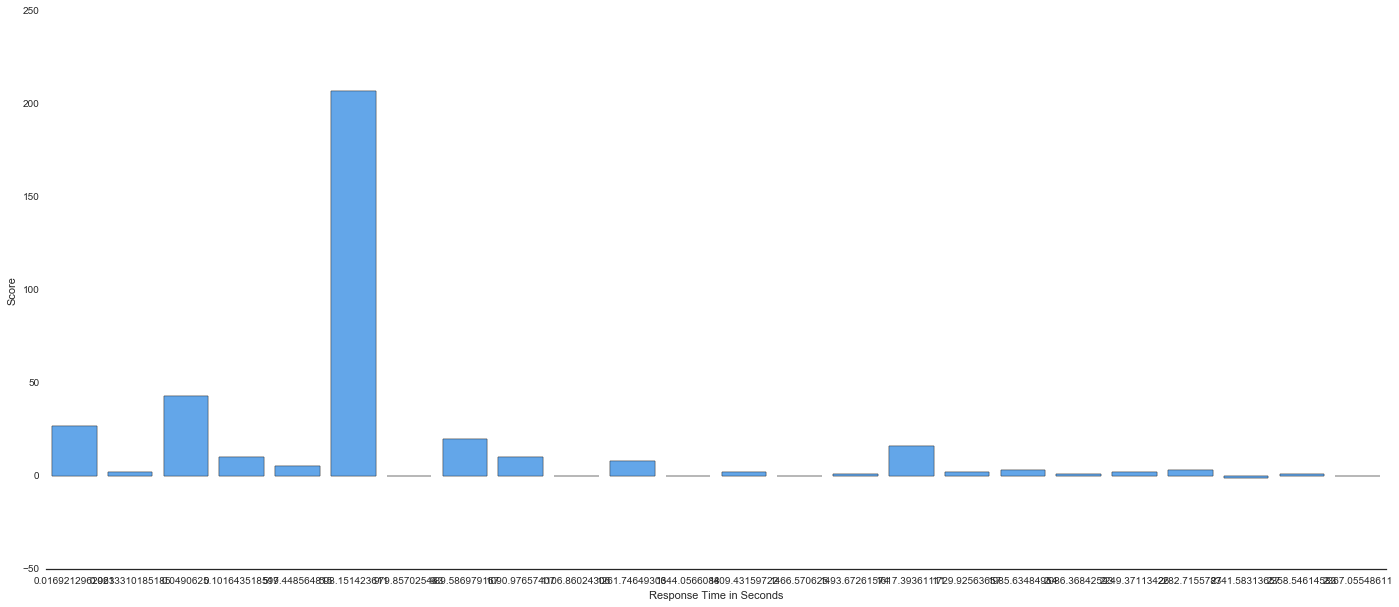

In [43]:

def plot_bar(x_data, y_data, x_label_axis, y_label_axis, color):
    # plot properties.
    sea.set_style("white")
    sea.set_context({"figure.figsize": (24, 10)})
    my_plot = sea.barplot(x = x_data, y = y_data, order = id_less, color = color)
    bar = plt.Rectangle((0,0), 1, 1, fc = color,  edgecolor = 'none')
    sea.despine(left = True)
    my_plot.set_xlabel(x_label_axis) # axes settings.
    my_plot.set_ylabel(y_label_axis)


# plot input
less_buffer = len(First_top) # change to see different plots, but labels might get mushed.
id_less = First_top['response_time'].tail(less_buffer)
quantity_less = First_top['Score'].tail(less_buffer)
x_label = "Response Time in Seconds"
y_label = "Score"
muted_blue = "#4da6ff"

# just use the function!
plot_bar(id_less, quantity_less, x_label, y_label, muted_blue)
plot_bar(id_less, quantity_less, x_label, y_label, muted_blue)



#### Score vs Response Time


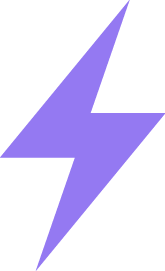

Running local mode, some functionality limited.



In [44]:
series1 = [First_top['Score'].tolist(), Second_top['Score'].tolist(), Third_top['Score'].tolist(), Fourth_top['Score'].tolist(), Fifth_top['Score'].tolist(), Sixth_top['Score'].tolist(), Seventh_top['Score'].tolist(), Eighth_top['Score'].tolist(), Ninth_top['Score'].tolist(), Tenth_top['Score'].tolist()] # Eleventh_top['Score'].tolist(), Twelfth_top['Score'].tolist(), Thirteenth_top['Score'].tolist(), Fourteenth_top['Score'].tolist(), Fifteenth_top['Score'].tolist(), Sixteenth_top['Score'].tolist(), Seventeenth_top['Score'].tolist(), Eighteenth_top['Score'].tolist(), Nineteenth_top['Score'].tolist(), Twentieth_top['Score'].tolist()]

lgn = Lightning(ipython=True, local=True)
#print series1
lgn.line(series1)

### Cleaning users_score data to plot Year vs Score

In [45]:
users_score.head(20)

clean_us = users_score
clean_us = clean_us.drop('idUser', 1)
#clean_us = clean_us.drop('posts_2008', 1)
clean_us = clean_us.drop('posts_2009', 1)
clean_us = clean_us.drop('posts_2010', 1)
clean_us = clean_us.drop('posts_2011', 1)
clean_us = clean_us.drop('posts_2012', 1)
clean_us = clean_us.drop('posts_2013', 1)
clean_us = clean_us.drop('posts_2014', 1)
clean_us = clean_us.drop('posts_2015', 1)
clean_us = clean_us.drop('posts_2016', 1)

In [46]:
clean_us = clean_us.values.tolist()
#plt.figure()
#users_score.overall_score_2012.plot(x_compat=True)

#### Year vs Score


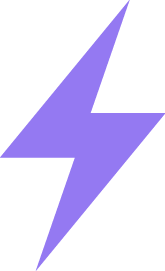

Running local mode, some functionality limited.



NameError: name 'clean_us' is not defined

In [150]:
lgn_user_yearly_score = Lightning(ipython=True, local=True)
lgn_user_yearly_score.line(clean_us, index=[9,10,11,12,13,14,15,16])